# Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset.

In [4]:
dataset = pd.read_excel("Superstore_dataset.xlsx")
dataset.head(10)

,Row ID,Order ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,...,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales
0,18606,88525,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,...,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90
1,20847,88522,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,...,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01
2,23086,88523,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,...,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92
3,23087,88523,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,...,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64
4,23088,88523,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,...,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67
5,23597,88524,Medium,0.09,55.48,14.30,3,Bonnie Potter,Express Air,Corporate,...,0.37,West,Washington,Anacortes,98221,2011-11-09,2011-11-11,1388.0523,37,2011.67
6,25549,88526,Low,0.08,120.97,26.30,3,Bonnie Potter,Delivery Truck,Corporate,...,0.38,West,Washington,Anacortes,98221,2013-07-01,2013-07-08,1001.4453,12,1451.37
7,20228,90193,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,...,0.60,West,California,San Gabriel,91776,2010-12-13,2010-12-15,4390.3665,12,6362.85
8,19483,90197,Low,0.08,6.48,6.81,5,Ronnie Proctor,Regular Air,Home Office,...,0.36,West,California,San Gabriel,91776,2012-05-12,2012-05-21,-141.2600,18,113.25
9,24782,90194,High,0.01,90.24,0.99,6,Dwight Hwang,Regular Air,Home Office,...,0.56,West,California,San Jose,95123,2011-05-26,2011-05-26,1045.4673,16,1515.17


In [15]:
dataset.shape

(9426, 24)

# Checking missing value in the dataset.

In [46]:
dataset.isnull().sum()

Row ID                  0
Order ID                0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
dtype: int64

# Filling missing values in the dataset.

In [13]:
dataset['Product Base Margin'] = dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean())

# Analysis of Order Priority column.

In [22]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [19]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [21]:
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ','Critical')

# Showing the Order Priority in the graph

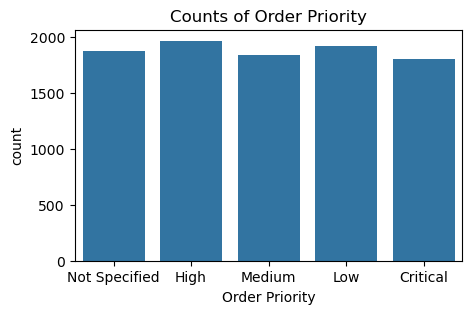

In [51]:
plt.figure(figsize=(5,3))
sns.countplot(x="Order Priority",data=dataset)
plt.title('Counts of Order Priority')
plt.savefig('Order Priority')
plt.show()

# Analysis of Ship Mode Column

In [32]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [37]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

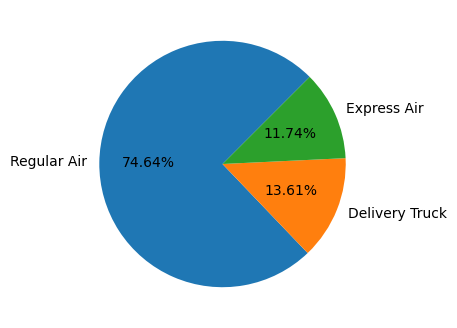

In [45]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle = 45,autopct='%0.2f%%')
plt.show()

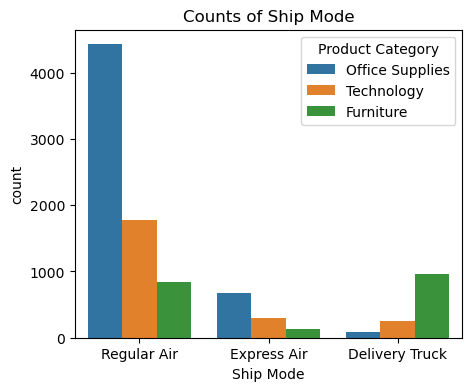

In [54]:
plt.figure(figsize=(5,4))
sns.countplot(x='Ship Mode',data=dataset,hue='Product Category')
plt.title('Counts of Ship Mode')
plt.show()

# Analysis of Customer Segment Column

In [56]:
dataset['Customer Segment'].value_counts()

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64

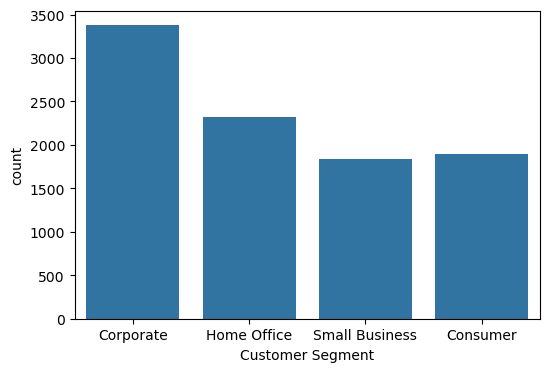

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Segment',data=dataset)
plt.show()

# Analysis of Product Category column.

In [64]:
dataset['Product Category'].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

In [68]:
x = dataset['Product Category'].value_counts().index
y = dataset['Product Category'].value_counts().values

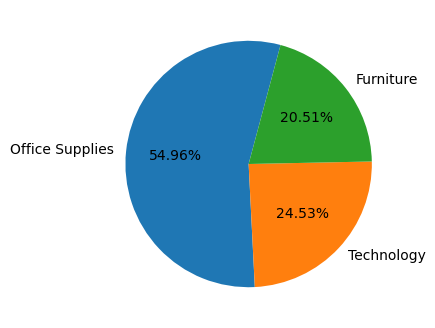

In [72]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle = 75,autopct='%0.2f%%')
plt.show()

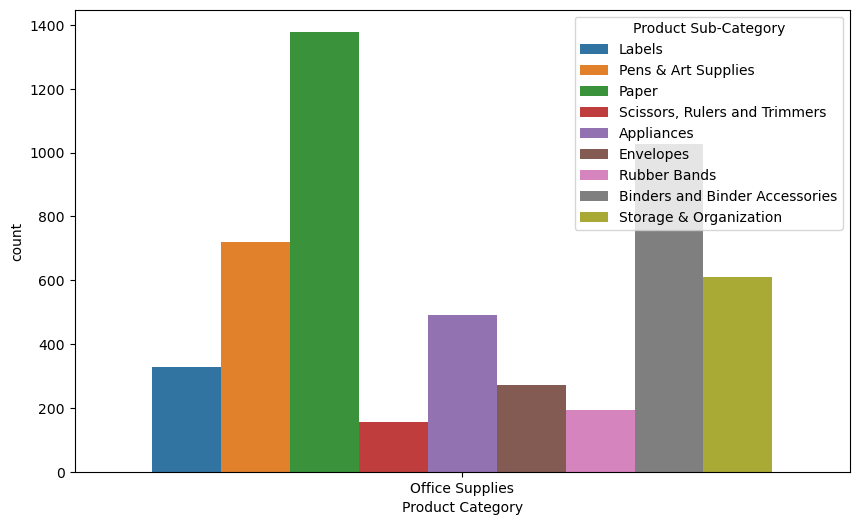

In [89]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category'] == 'Office Supplies'],hue='Product Sub-Category')
plt.show()

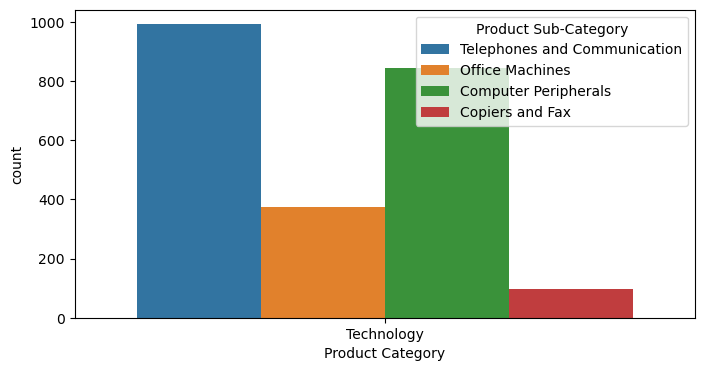

In [94]:
plt.figure(figsize=(8,4))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category'] == 'Technology'],hue='Product Sub-Category')
plt.show()

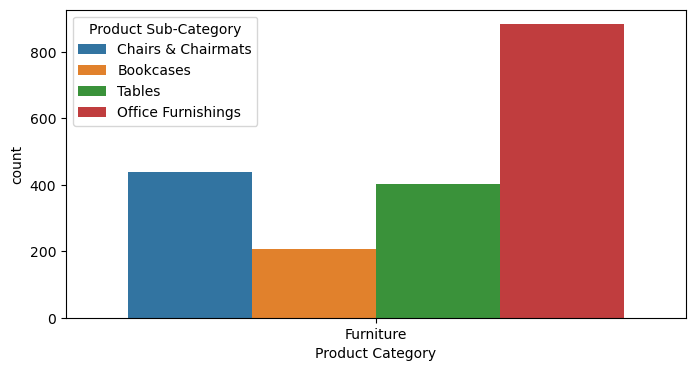

In [95]:
plt.figure(figsize=(8,4))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category'] == 'Furniture'],hue='Product Sub-Category')
plt.show()

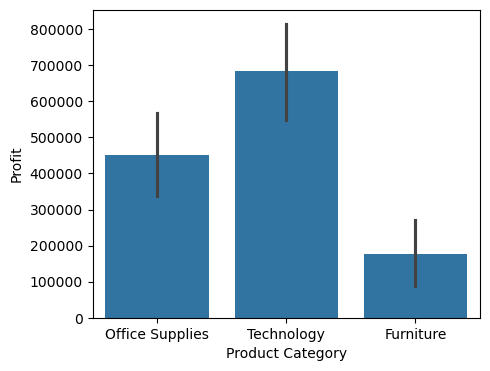

In [108]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category',y='Profit',data=dataset,estimator='sum')
plt.show()

# Analysis of Order Date Column.

In [97]:
dataset['Order Year'] = dataset['Order Date'].dt.year

In [98]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

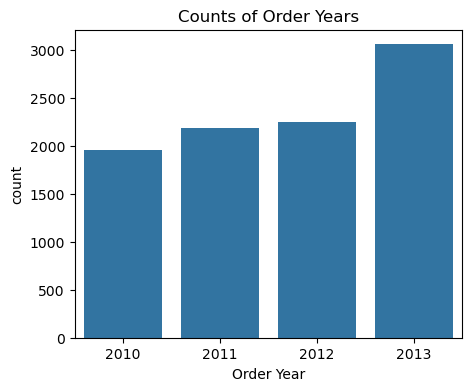

In [102]:
plt.figure(figsize=(5,4))
sns.countplot(x='Order Year',data=dataset)
plt.title('Counts of Order Years')
plt.show()

# Analysis of State or Province column

In [117]:
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64